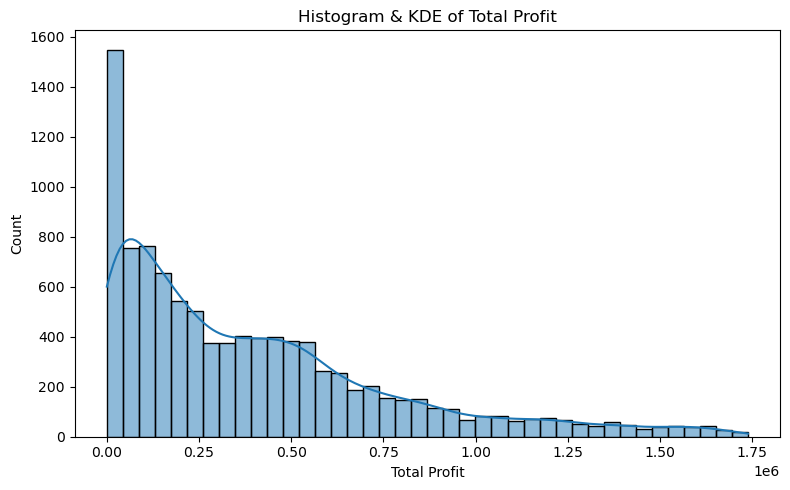

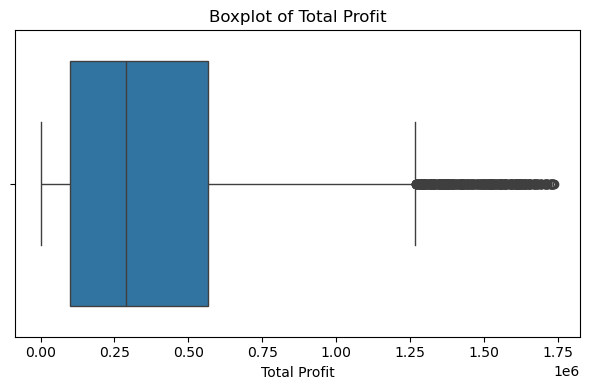

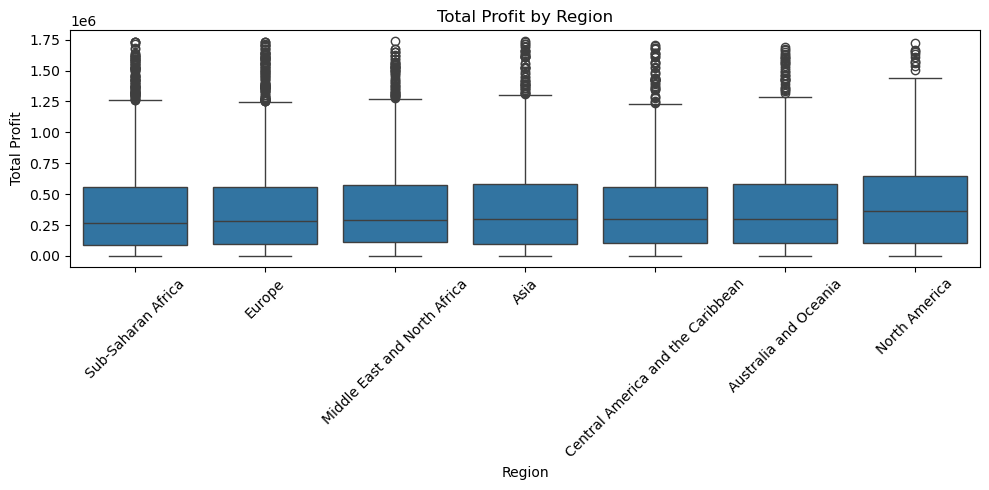

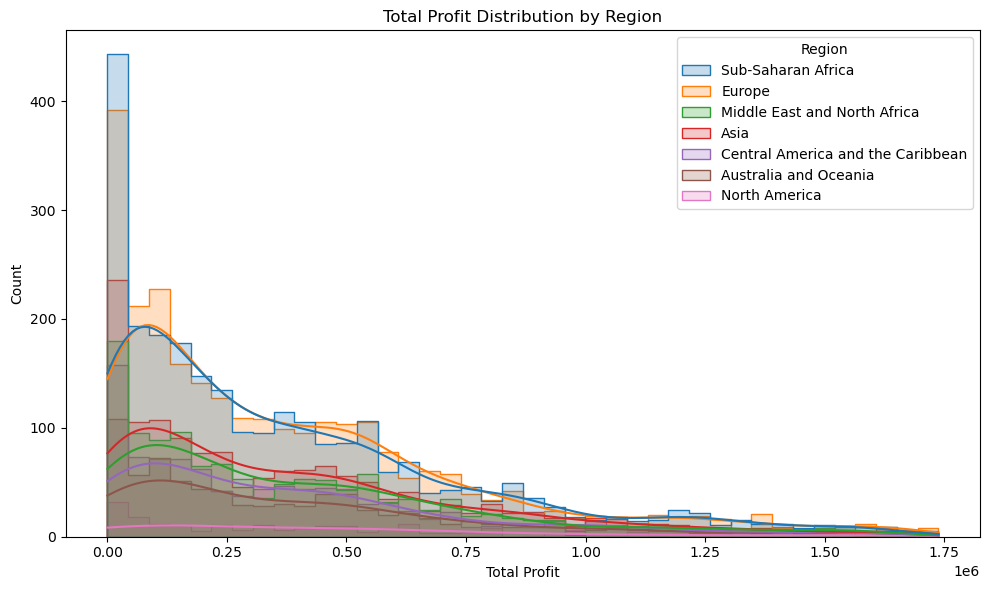


The Total Profit distribution has a mean of 395089.35 and a median of 289099.02,
with a standard deviation of 377554.96. The skewness value of 1.28
indicates the distribution is positively skewed.
Using the IQR method, 419 outliers were detected.
From the boxplots and histograms, noticeable variation in profit distribution exists across different regions,
with some regions showing higher spread and extreme values compared to others.


Project Completed ✅ Plots & interpretation exported.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

df = pd.read_csv( r"C:\Users\meetr\OneDrive\Documents\10000 Sales Records.csv")

numeric_col = "Total Profit"
group_col = "Region"

df = df[[numeric_col, group_col]].dropna()


plt.figure(figsize=(8,5))
sns.histplot(df[numeric_col], kde=True)
plt.title("Histogram & KDE of Total Profit")
plt.tight_layout()
plt.savefig("histogram_kde.png")
plt.show()


plt.figure(figsize=(6,4))
sns.boxplot(x=df[numeric_col])
plt.title("Boxplot of Total Profit")
plt.tight_layout()
plt.savefig("boxplot_overall.png")
plt.show()


plt.figure(figsize=(10,5))
sns.boxplot(x=group_col, y=numeric_col, data=df)
plt.xticks(rotation=45)
plt.title("Total Profit by Region")
plt.tight_layout()
plt.savefig("boxplot_by_region.png")
plt.show()

plt.figure(figsize=(10,6))
sns.histplot(data=df, x=numeric_col, hue=group_col, kde=True, element="step")
plt.title("Total Profit Distribution by Region")
plt.tight_layout()
plt.savefig("histogram_by_region.png")
plt.show()


Q1 = df[numeric_col].quantile(0.25)
Q3 = df[numeric_col].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = df[(df[numeric_col] < lower) | (df[numeric_col] > upper)]


mean_val = df[numeric_col].mean()
median_val = df[numeric_col].median()
std_val = df[numeric_col].std()
skew_val = skew(df[numeric_col])


interpretation = f"""
The Total Profit distribution has a mean of {mean_val:.2f} and a median of {median_val:.2f},
with a standard deviation of {std_val:.2f}. The skewness value of {skew_val:.2f}
indicates the distribution is {'positively skewed' if skew_val > 0 else 'negatively skewed' if skew_val < 0 else 'approximately symmetric'}.
Using the IQR method, {len(outliers)} outliers were detected.
From the boxplots and histograms, noticeable variation in profit distribution exists across different regions,
with some regions showing higher spread and extreme values compared to others.
"""

print(interpretation)

with open("interpretation.txt", "w") as f:
    f.write(interpretation)

print("\nProject Completed ✅ Plots & interpretation exported.")
